In [1]:
import numpy as np
import pandas as pd
#importing basic libraries for analysis

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6407,6728-CZFEI,Female,0,No,No,15,Yes,No,DSL,No,...,No,No,Yes,No,One year,No,Mailed check,56.15,931.9,No
4123,8910-LEDAG,Male,1,Yes,No,34,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),71.55,2427.35,No
4845,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),39.40,825.4,No
2455,8481-YYXWG,Female,0,No,No,5,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,89.35,461.7,Yes
5238,7841-FCRQD,Female,0,Yes,No,33,Yes,No,DSL,No,...,No,Yes,No,No,One year,Yes,Credit card (automatic),53.75,1857.3,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum() # no missing 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df=df.drop('customerID',axis=1)

In [9]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [10]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
y=df["Churn"]
x=df.drop("Churn",axis=1)

In [13]:
df["Churn"].value_counts(normalize=True)*100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

that means our churn rate is 26.54%

In [14]:
cat_cols=x.select_dtypes(include=["object"]).columns.tolist()
num_cols=x.select_dtypes(include=["float64","int64"]).columns.tolist()

In [15]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [16]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [18]:
ct=ColumnTransformer([
    ("trf1",OneHotEncoder(drop=None,handle_unknown= "ignore",sparse_output=False),cat_cols),
    ("trf2",StandardScaler(),num_cols)
],remainder="passthrough")

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [20]:
x_train_transformed=ct.fit_transform(x_train)
x_test_transformed=ct.transform(x_test)

In [21]:
x_train_transformed.shape

(5634, 45)

In [22]:
x_test_transformed.shape

(1409, 45)

In [23]:
x_train_transformed

array([[ 0.        ,  1.        ,  1.        , ...,  0.10237124,
        -0.52197565, -0.26369549],
       [ 0.        ,  1.        ,  0.        , ..., -0.71174346,
         0.33747781, -0.5050764 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.79315493,
        -0.80901319, -0.75132793],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.30468611,
         1.25666162,  0.15691108],
       [ 1.        ,  0.        ,  0.        , ..., -0.34539184,
        -1.47766135, -0.79852029],
       [ 0.        ,  1.        ,  1.        , ..., -1.07809507,
        -1.46936546, -0.96241007]])

In [24]:
x_test_transformed

array([[ 0.        ,  1.        ,  0.        , ...,  1.60848343,
         1.62997635,  2.70543012],
       [ 1.        ,  0.        ,  1.        , ..., -0.9966836 ,
         1.16872526, -0.61170349],
       [ 1.        ,  0.        ,  0.        , ...,  0.34660565,
         0.44532428,  0.3986869 ],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -1.11880081,
        -1.46936546, -0.96932109],
       [ 1.        ,  0.        ,  1.        , ...,  0.95719167,
        -1.50088982, -0.54880228],
       [ 1.        ,  0.        ,  0.        , ...,  1.60848343,
         0.18317439,  1.25631095]])

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


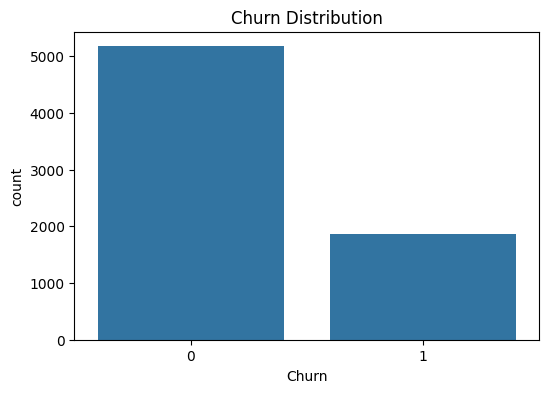

In [26]:
#Lets see how churn distribution looks like
plt.figure(figsize=(6,4))
sns.countplot(x="Churn",data=df)
plt.title("Churn Distribution")
plt.show()

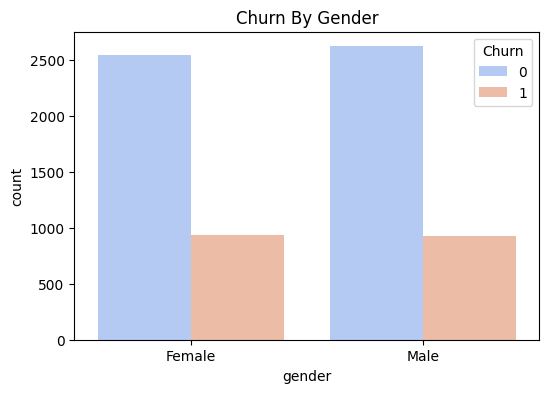

In [27]:
# Now lets see Gender vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="gender",hue="Churn",data=df,palette="coolwarm")
plt.title("Churn By Gender")
plt.show()

-> From the above graph we can say that Gender doesn't affect the Churn that significantly.

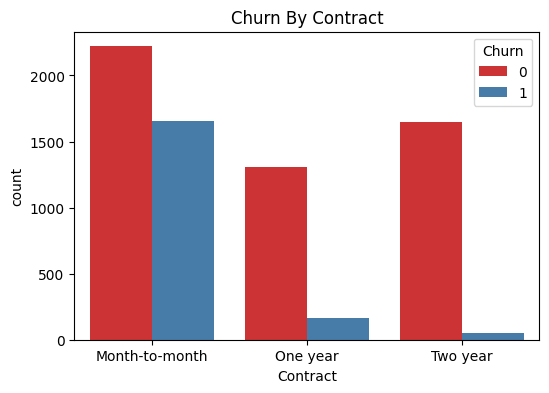

In [28]:
# Now lets see Contract Type vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="Contract",hue="Churn",data=df,palette="Set1")
plt.title("Churn By Contract")
plt.show()

->From the above countplot ,we can clearly observe that the Customers having month to month contarct have highest churn among the contract types

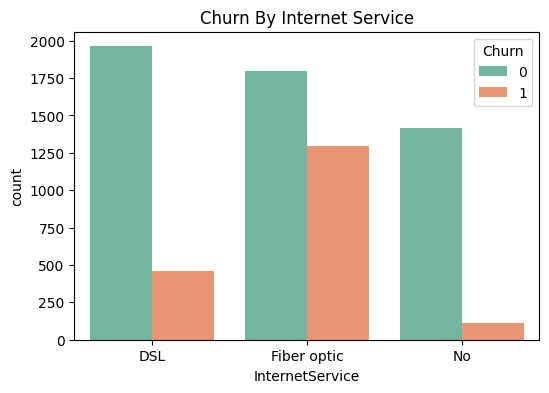

In [29]:
# Now lets see Internet Service vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService",hue="Churn",data=df,palette="Set2")
plt.title("Churn By Internet Service")
plt.show()

->From the above graph , We can clearly draw the insight that customer with Fiber Optic Internet Service have higher churn than DSL.There is a high chance there might be some issue with the fibre optic internet service in satisfying the customer need.

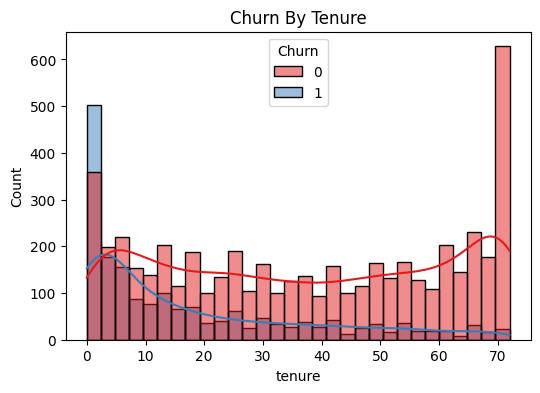

In [30]:
# Now lets see Tenure vs Churn
plt.figure(figsize=(6,4))
sns.histplot(x="tenure",hue="Churn",bins=30,kde=True,data=df,palette="Set1")
plt.title("Churn By Tenure")
plt.show()

-> From the above histplot, we can observe that new customers have a higher churn rate

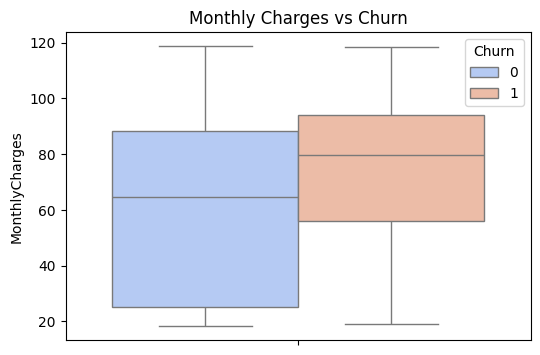

In [31]:
# Now lets see Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(hue="Churn",y="MonthlyCharges",data=df,palette="coolwarm")
plt.title("Monthly Charges vs Churn")
plt.show()

-> Above graph tells us that, Customer with higher Monthly charges have higher Churn rate than that of the customers who have lower monthly charges.

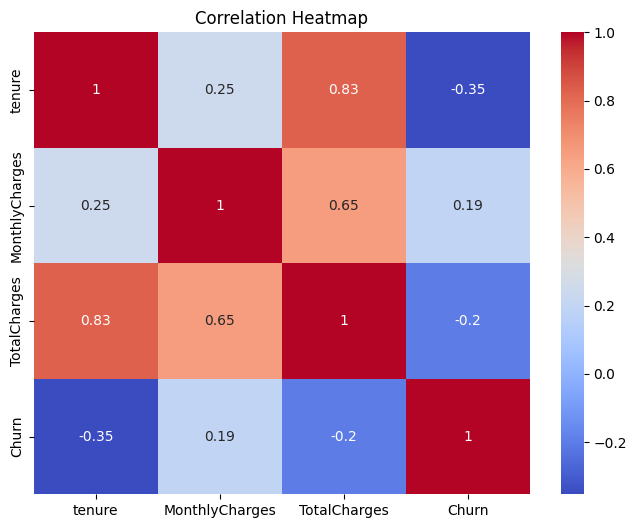

In [32]:
# Now lets see Gender vs Churn
plt.figure(figsize=(8,6))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges","Churn"]].corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
np.isnan(x_train_transformed).sum()

np.int64(8)

In [35]:
lr=LogisticRegression(max_iter=10000)
x_train_transformed=np.nan_to_num(x_train_transformed)
x_test_transformed=np.nan_to_num(x_test_transformed)
lr.fit(x_train_transformed,y_train)
y_pred_lr=lr.predict(x_test_transformed)

In [36]:
print("Accuracy of logistic regression:",accuracy_score(y_test,y_pred_lr)*100,"%") #accuracy of logistic regression 

Accuracy of logistic regression: 80.48261178140525 %


In [37]:
ct_rf_xgb=ColumnTransformer([
    ("ohe",OneHotEncoder(drop=None,handle_unknown="ignore",sparse_output=False),cat_cols)
],remainder="passthrough")
x_train_rfxgb=ct_rf_xgb.fit_transform(x_train)
x_test_rfxgb=ct_rf_xgb.transform(x_test)
rf=RandomForestClassifier(n_estimators=500,
                          max_depth=10,
                          random_state=42,
                          class_weight="balanced")
rf.fit(x_train_rfxgb,y_train)
y_pred_rf=rf.predict(x_test_rfxgb)

In [38]:
print("Accuracy of Random Forest:",accuracy_score(y_test,y_pred_rf)*100,"%") #accuracy of Random Forest Classifier 

Accuracy of Random Forest: 77.14691270404542 %


In [39]:
xgb=XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),#to handle imbalance
    eval_metric="logloss",
    random_state=42)
xgb.fit(x_train_rfxgb,y_train)
y_pred_xgb=xgb.predict(x_test_rfxgb)

In [40]:
print("Accuracy of XGBoost:",accuracy_score(y_test,y_pred_rf)*100,"%") #accuracy of Random Forest Classifier 

Accuracy of XGBoost: 77.14691270404542 %


In [41]:
from sklearn.metrics import roc_auc_score
y_prob_lr=lr.predict_proba(x_test_transformed)[:,1]
print("Logistic ROC AUC score: ", roc_auc_score(y_test,y_prob_lr))

Logistic ROC AUC score:  0.8417835645457129


In [42]:
y_prob_rf=rf.predict_proba(x_test_rfxgb)[:,1]
print("Random Forest ROC AUC score: ", roc_auc_score(y_test,y_prob_rf))

Random Forest ROC AUC score:  0.8392066444496113


In [43]:
y_prob_xgb=xgb.predict_proba(x_test_rfxgb)[:,1]
print("XGBoost ROC AUC score: ", roc_auc_score(y_test,y_prob_xgb))

XGBoost ROC AUC score:  0.8193792141362475


In [44]:
from sklearn.metrics import precision_score,recall_score,f1_score

models={"Logistic Regression":(y_test,y_pred_lr,y_prob_lr),
       "Random Forest":(y_test,y_pred_rf,y_prob_rf),
       "XGBoost":(y_test,y_pred_xgb,y_prob_xgb)
       }
comparison=[]
for name,(y_true,y_pred,y_prob) in models.items():
    comparison.append({
        "Model":name,
        "Accuracy":accuracy_score(y_true,y_pred),
        "Precison":precision_score(y_true,y_pred),
        "Recall":recall_score(y_true,y_pred),
        "F1-Score":f1_score(y_true,y_pred),
        "ROC AUC score":roc_auc_score(y_true,y_prob)
    })
results_df=pd.DataFrame(comparison)
results_df

,Model,Accuracy,Precison,Recall,F1-Score,ROC AUC score
0,Logistic Regression,0.804826,0.656151,0.556150,0.602026,0.841784
1,Random Forest,0.771469,0.553719,0.716578,0.624709,0.839207
2,XGBoost,0.770050,0.558962,0.633690,0.593985,0.819379


In [45]:
ohe=ct_rf_xgb.named_transformers_["ohe"]
encoded_cols=ohe.get_feature_names_out(cat_cols)
all_features=np.concatenate([encoded_cols,num_cols])
importances=rf.feature_importances_
feat_imp=pd.Series(importances,index=all_features).sort_values(ascending=False)
feat_imp.head(10)

tenure                            0.125232
TotalCharges                      0.106870
Contract_Month-to-month           0.106692
MonthlyCharges                    0.081663
Contract_Two year                 0.060450
OnlineSecurity_No                 0.052280
TechSupport_No                    0.044582
InternetService_Fiber optic       0.042361
PaymentMethod_Electronic check    0.034548
Contract_One year                 0.021030
dtype: float64

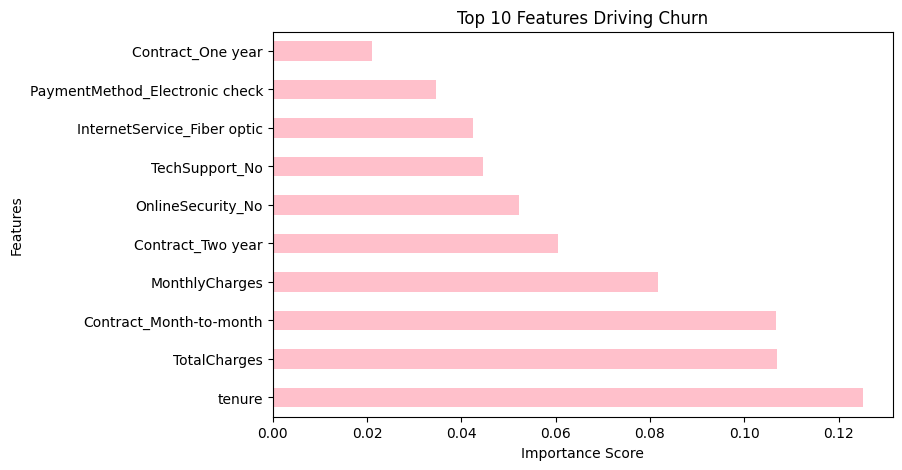

In [46]:
#visualising the top 10 features
feat_imp.head(10).plot(kind="barh",figsize=(8,5),color="pink")
plt.title("Top 10 Features Driving Churn")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [49]:
import joblib
joblib.dump(rf,'rf_model_churn_compressed.pkl',compress=3)
joblib.dump(ct,'ColumnTransformer_compressed.pkl',compress=3)

['ColumnTransformer_compressed.pkl']